In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from acquire import get_zillow_data
from wrangle import wrangle_zillow


In [2]:
df = get_zillow_data()

In [3]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [4]:
train, validate, test = wrangle_zillow()
train.shape, validate.shape, test.shape

((1167316, 7), (500279, 7), (416899, 7))

In [5]:
train.head()

,bedrooms,bathrooms,square_feet,tax_value,year_built,tax_amount,fips
397209,4,3.0,2287,741697,1997,8642.98,6059
920033,2,1.0,918,158409,1947,2381.94,6037
311353,4,2.5,1932,374400,1976,4738.44,6059
672101,3,3.0,2717,932755,1925,10822.44,6037
450335,3,2.5,1476,515000,1973,5925.12,6059


In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1167316 entries, 397209 to 903174
Data columns (total 7 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   bedrooms     1167316 non-null  int64  
 1   bathrooms    1167316 non-null  float64
 2   square_feet  1167316 non-null  int64  
 3   tax_value    1167316 non-null  int64  
 4   year_built   1167316 non-null  int64  
 5   tax_amount   1167316 non-null  float64
 6   fips         1167316 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 71.2 MB


Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tax_value using only square_feet.

In [6]:
baseline = round(train['tax_value'].mean(), 2)
baseline

399082.32

In [7]:
preds = train[['square_feet', 'tax_value']]
preds.head()

,square_feet,tax_value
397209,2287,741697
920033,918,158409
311353,1932,374400
672101,2717,932755
450335,1476,515000


In [8]:
preds['baseline_preds'] = baseline
preds.head()

/var/folders/9q/slnrpghs0r78mkz6d7_q_hj40000gp/T/ipykernel_64606/3933155626.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preds['baseline_preds'] = baseline


,square_feet,tax_value,baseline_preds
397209,2287,741697,399082.32
920033,918,158409,399082.32
311353,1932,374400,399082.32
672101,2717,932755,399082.32
450335,1476,515000,399082.32


In [9]:
ols_model = LinearRegression()

ols_model.fit(train[['square_feet']], train[['tax_value']])

LinearRegression()

In [10]:
preds['yhat'] = ols_model.predict(train[['square_feet']])
preds.head()

/var/folders/9q/slnrpghs0r78mkz6d7_q_hj40000gp/T/ipykernel_64606/1663146348.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preds['yhat'] = ols_model.predict(train[['square_feet']])


,square_feet,tax_value,baseline_preds,yhat
397209,2287,741697,399082.32,513857.544211
920033,918,158409,399082.32,192806.331660
311353,1932,374400,399082.32,430604.673169
672101,2717,932755,399082.32,614699.049979
450335,1476,515000,399082.32,323665.774029


In [45]:
preds['baseline_res'] = preds['baseline_preds'] - preds['tax_value']

preds.head()

,square_feet,tax_value,baseline_preds,yhat,baseline_res,yhat_res,baseline_res_squared,yhat_res_squared,yhat_mean_res,yhat_mean_res_squared
397209,2287,741697,399082.32,513857.544211,-342614.68,-227839.455789,1.173848e+11,5.191082e+10,114775.224211,1.317335e+10
920033,918,158409,399082.32,192806.331660,240673.32,34397.331660,5.792365e+10,1.183176e+09,-206275.988340,4.254978e+10
311353,1932,374400,399082.32,430604.673169,24682.32,56204.673169,6.092169e+08,3.158965e+09,31522.353169,9.936587e+08
672101,2717,932755,399082.32,614699.049979,-533672.68,-318055.950021,2.848065e+11,1.011596e+11,215616.729979,4.649057e+10
450335,1476,515000,399082.32,323665.774029,-115917.68,-191334.225971,1.343691e+10,3.660879e+10,-75416.545971,5.687655e+09


Plot the residuals for the linear regression model that you made.

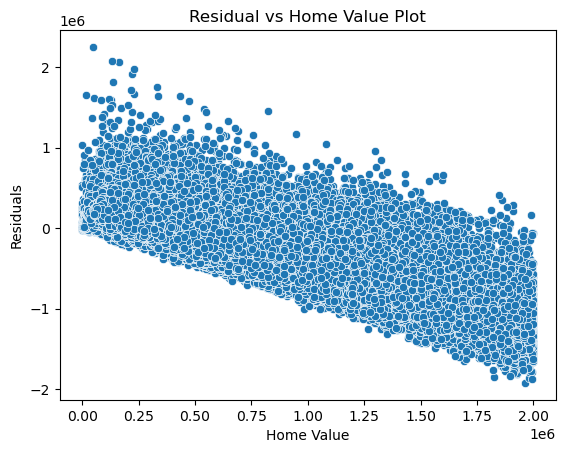

In [53]:
sns.scatterplot(data=preds, x='tax_value', y='yhat_res')
plt.xlabel('Home Value')
plt.ylabel('Residuals')
plt.title('Residual vs Home Value Plot')
plt.show()

In [13]:
preds['yhat_res'] = preds['yhat'] - preds['tax_value']
preds.head()

/var/folders/9q/slnrpghs0r78mkz6d7_q_hj40000gp/T/ipykernel_64606/2865484425.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preds['yhat_res'] = preds['yhat'] - preds['tax_value']


,square_feet,tax_value,baseline_preds,yhat,baseline_res,yhat_res
397209,2287,741697,399082.32,513857.544211,-342614.68,-227839.455789
920033,918,158409,399082.32,192806.331660,240673.32,34397.331660
311353,1932,374400,399082.32,430604.673169,24682.32,56204.673169
672101,2717,932755,399082.32,614699.049979,-533672.68,-318055.950021
450335,1476,515000,399082.32,323665.774029,-115917.68,-191334.225971


/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


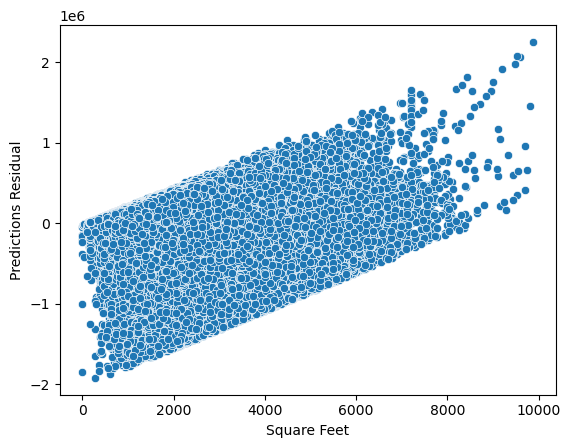

In [54]:
sns.scatterplot(preds['square_feet'], preds['yhat_res'])
plt.xlabel('Square Feet')
plt.ylabel('Predictions Residual')
plt.show()

Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [15]:
preds.columns

Index(['square_feet', 'tax_value', 'baseline_preds', 'yhat', 'baseline_res',
       'yhat_res'],
      dtype='object')

In [16]:
preds['baseline_res_squared'] = preds['baseline_res'] ** 2
preds['yhat_res_squared'] = preds['yhat_res'] ** 2
preds.head()

,square_feet,tax_value,baseline_preds,yhat,baseline_res,yhat_res,baseline_res_squared,yhat_res_squared
397209,2287,741697,399082.32,513857.544211,-342614.68,-227839.455789,1.173848e+11,5.191082e+10
920033,918,158409,399082.32,192806.331660,240673.32,34397.331660,5.792365e+10,1.183176e+09
311353,1932,374400,399082.32,430604.673169,24682.32,56204.673169,6.092169e+08,3.158965e+09
672101,2717,932755,399082.32,614699.049979,-533672.68,-318055.950021,2.848065e+11,1.011596e+11
450335,1476,515000,399082.32,323665.774029,-115917.68,-191334.225971,1.343691e+10,3.660879e+10


In [17]:
sse_baseline = preds['baseline_res_squared'].sum()
sse_yhat = preds['yhat_res_squared'].sum()

sse_baseline, sse_yhat

(1.1498901319990134e+17, 7.52766571159468e+16)

In [18]:
mse_baseline = sse_baseline / len(preds)
mse_yhat = sse_yhat / len(preds)

mse_baseline, mse_yhat

(98507185029.50473, 64486957358.544556)

In [19]:
rmse_baseline = sqrt(mse_baseline)
rmse_yhat = sqrt(mse_yhat)

rmse_baseline, rmse_yhat

(313858.5430245682, 253942.82301050477)

In [20]:
sqrt(mean_squared_error(preds['tax_value'], preds['baseline_preds']))

313858.5430245682

Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

In [21]:
preds.head()

,square_feet,tax_value,baseline_preds,yhat,baseline_res,yhat_res,baseline_res_squared,yhat_res_squared
397209,2287,741697,399082.32,513857.544211,-342614.68,-227839.455789,1.173848e+11,5.191082e+10
920033,918,158409,399082.32,192806.331660,240673.32,34397.331660,5.792365e+10,1.183176e+09
311353,1932,374400,399082.32,430604.673169,24682.32,56204.673169,6.092169e+08,3.158965e+09
672101,2717,932755,399082.32,614699.049979,-533672.68,-318055.950021,2.848065e+11,1.011596e+11
450335,1476,515000,399082.32,323665.774029,-115917.68,-191334.225971,1.343691e+10,3.660879e+10


In [22]:
preds['yhat_mean_res'] = preds['yhat'] - preds['baseline_preds']
preds.head()

,square_feet,tax_value,baseline_preds,yhat,baseline_res,yhat_res,baseline_res_squared,yhat_res_squared,yhat_mean_res
397209,2287,741697,399082.32,513857.544211,-342614.68,-227839.455789,1.173848e+11,5.191082e+10,114775.224211
920033,918,158409,399082.32,192806.331660,240673.32,34397.331660,5.792365e+10,1.183176e+09,-206275.988340
311353,1932,374400,399082.32,430604.673169,24682.32,56204.673169,6.092169e+08,3.158965e+09,31522.353169
672101,2717,932755,399082.32,614699.049979,-533672.68,-318055.950021,2.848065e+11,1.011596e+11,215616.729979
450335,1476,515000,399082.32,323665.774029,-115917.68,-191334.225971,1.343691e+10,3.660879e+10,-75416.545971


In [23]:
preds['yhat_mean_res_squared'] = preds['yhat_mean_res'] ** 2
preds.head()

,square_feet,tax_value,baseline_preds,yhat,baseline_res,yhat_res,baseline_res_squared,yhat_res_squared,yhat_mean_res,yhat_mean_res_squared
397209,2287,741697,399082.32,513857.544211,-342614.68,-227839.455789,1.173848e+11,5.191082e+10,114775.224211,1.317335e+10
920033,918,158409,399082.32,192806.331660,240673.32,34397.331660,5.792365e+10,1.183176e+09,-206275.988340,4.254978e+10
311353,1932,374400,399082.32,430604.673169,24682.32,56204.673169,6.092169e+08,3.158965e+09,31522.353169,9.936587e+08
672101,2717,932755,399082.32,614699.049979,-533672.68,-318055.950021,2.848065e+11,1.011596e+11,215616.729979,4.649057e+10
450335,1476,515000,399082.32,323665.774029,-115917.68,-191334.225971,1.343691e+10,3.660879e+10,-75416.545971,5.687655e+09


Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [24]:
ess_baseline = 0
ess_yhat = preds['yhat_mean_res_squared'].sum()
ess_yhat

3.9712356083954504e+16

In [25]:
tss_baseline = sse_baseline + ess_baseline
tss_baseline

1.1498901319990134e+17

In [26]:
tss_yhat = sse_yhat + ess_yhat
tss_yhat

1.1498901319990131e+17

In [27]:
ess_baseline / tss_baseline

0.0

In [28]:
ess_yhat / tss_yhat

0.34535783009909843

What is the amount of variance explained in your model?

In [32]:
evs = explained_variance_score(preds['tax_value'], preds['yhat'])
evs

0.3453578300990986

Is your model better than the baseline model?

In [40]:
    if evs > baseline:
        print('My OSL model baseline performs better than the baseline')
    else:
        print('My OSL model baseline does not perform better than the baseline')

False


Create a file named evaluate.py that contains the following functions.  
  
plot_residuals(y, yhat): creates a residual plot  
regression_errors(y, yhat): returns the following values:  
sum of squared errors (SSE)  
explained sum of squares (ESS)  
total sum of squares (TSS)  
mean squared error (MSE)  
root mean squared error (RMSE)  
baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model  
better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false  

In [61]:
#residual plot
def plot_residuals(y, yhat):
    '''this function takes in y and yhat and creates a residual plot'''
    residuals = y - yhat
    
    plt.scatter(x=y, y=residuals)
    plt.xlabel('Home Value')
    plt.ylabel('Residuals')
    plt.title('Residual vs Home Value Plot')
    plt.show()

def regression_errors(y, yhat):
    '''this functions takes in y and yhat and returns SSE, ESS, TSS, MSE, and RMSE'''   
    MSE = mean_squared_error(y, yhat)
    SSE = MSE * len(y)
    RMSE = MSE**.5
    
    ESS = ((yhat - y.mean())**2).sum()
    TSS = ESS + SSE
    
    return SSE, ESS, TSS, MSE, RMSE

def baseline_mean_errors(y):
    '''this function computes the SSE, MSE, and RMSE for the baseline model'''   
    baseline = np.repeat(y.mean(), len(y))
    
    MSE = mean_squared_error(y, baseline)
    SSE = MSE * len(y)
    RMSE = MSE**.5
    
    return SSE, MSE, RMSE

def better_than_baseline(y, yhat):
    '''this function returns true if the model performs better than the baseline, otherwise 
   it returns False'''
    SSE, ESS, TSS, MSE, RMSE = regression_errors(y, yhat)
    
    SSE_baseline, MSE_baseline, RMSE_baseline = baseline_mean_errors(y)
    
    if SSE < SSE_baseline:
        print('My OSL model performs better than baseline')
    else:
        print('My OSL model performs worse than baseline.')
    
    
    
    
    
    
    

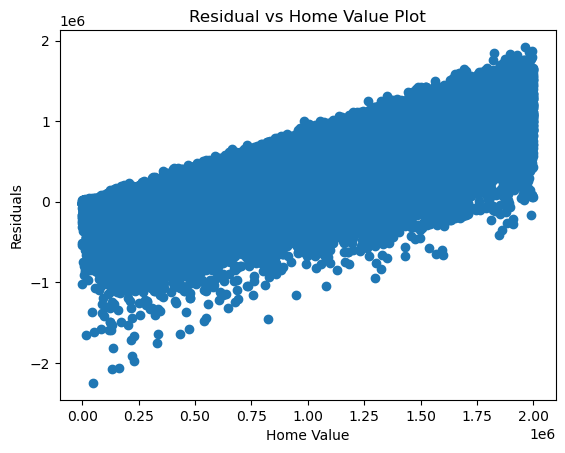

In [58]:
plot_residuals(preds.tax_value, preds.yhat)

In [68]:
regression_errors(preds.tax_value, preds.yhat)

(7.52766571159468e+16,
 3.971235608395451e+16,
 1.1498901319990131e+17,
 64486957358.544556,
 253942.82301050477)

In [63]:
baseline_mean_errors(preds.tax_value)

(1.1498901319990133e+17, 98507185029.50471, 313858.5430245682)

In [69]:
better_than_baseline(preds.tax_value, preds.yhat)

My OSL model performs better than baseline
